# Data Visualization

The objectives for this lesson are to interprete basics of visualization theory and apply it on different datasets using python libraries.

## Why plots?

![example4](../images/male_height.jpg)

![example1](../images/Fox1.png)

![example2](../images/Fox2.png)

![example3](../images/Fox3.png)

![example5](../images/pinera.jpg)

* 70% of the sensory receptors in the human body are dedicated to vision.
* Brain has been evolutionarily trained to interpret visual information in a massive way.

> _“The eye and the visual cortex of the brain form a massively parallel processor that provides the highest bandwidth channel into human cognitive centers”
>
> --<cite> Colin Ware, Information Visualization, 2004 </cite>--

## Theory

__Human Visual System__
* Good news
    - Graphs provide information that statistics might not.
    - Visual display is essential for understanding.
* Bad news
    - Attention is selective and can easily be misled.

![IO1a](../images/IO1a.png)


![IO1b](../images/IO1b.png)

![IO2a](../images/IO2a.png)

![IO2b](../images/IO2b.png)

__Advice__

Noah Illinsky, in his talk [Four pillars of visualization](https://www.youtube.com/watch?v=3eZ15VplE3o), presents good advice on how to perform a correct visualization:

* Purpose
* Information/Content
* Encoding/Structure
* Format

This indicates that a visualization is not the result of some data. A visualization is designed, thought out, and then appropriate sources of information are sought.

__Elements for creating a good visualization__

1. ***Honesty***: Visual representations must not mislead the viewer.
1. ***Prioritization***: the most important data must use an element of better perception.
1. ***Expressiveness***: data must use elements with appropriate attributions.
1. ***Consistency***: visual coding must allow data to be reproduced.

The basic principle to respect is that from the graph one must be able to easily interpret the original data.

## Matplotlib 

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

* Create publication quality plots.
* Make interactive figures that can zoom, pan, update.
* Customize visual style and layout.
* Export to many file formats.
* Embed in JupyterLab and Graphical User Interfaces.
* Use a rich array of third-party packages built on Matplotlib.

Source: https://matplotlib.org/

![matplotlib_anatomy](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will use the same Heart Disease dataset that we used in the last activity.

https://archive-beta.ics.uci.edu/dataset/45/heart+disease

In [3]:
heart_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    names=[
        "age",
        "sex",
        "cp",
        "trestbps",
        "chol",
        "fbs",
        "restecg",
        "thalach",
        "exang",
        "oldpeak",
        "slope",
        "ca",
        "thal",
        "num",
    ]
)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Scatter Plot

In [7]:
x = heart_df["age"].values
y = heart_df["chol"].values
c = heart_df["sex"].values

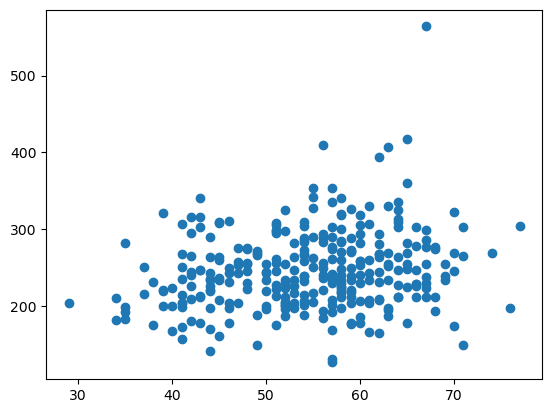

In [11]:
fig, ax = plt.subplots()
ax.scatter(x, y)

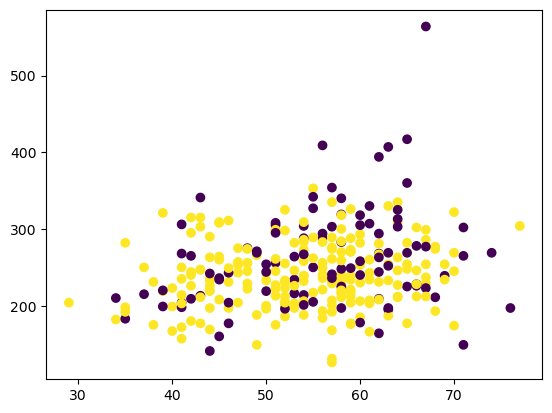

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=c)

### Line Plot

Since we don't have any ordered continuous data in this dataset let's use synthetic data trying to plot the function

$$
f(t) = e^{-t} \cos(2 \pi t)
$$

In [20]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0, 5.0, 0.5)
t2 = np.arange(0.0, 5.0, 0.02)

Text(0.5, 1.0, 'arange step = 0.5')

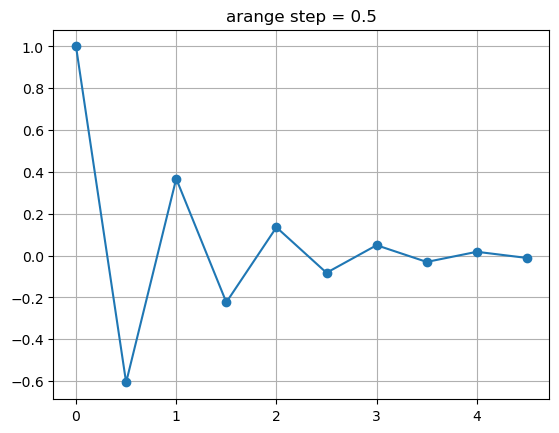

In [21]:
fig, ax = plt.subplots()

ax.plot(t1, f(t1), marker='o')
ax.grid()
ax.set_title("arange step = 0.5")

/tmp/ipykernel_509/2914122446.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


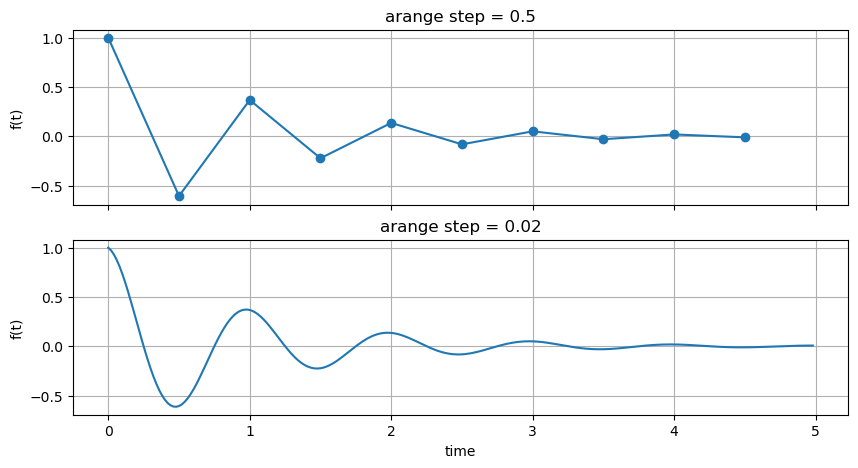

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 5), sharex=True, sharey=True)

ax1.plot(t1, f(t1), marker='o')
ax1.grid()
ax1.set_ylabel("f(t)")
ax1.set_title("arange step = 0.5")

ax2.plot(t2, f(t2))
ax2.grid()
ax2.set_ylabel("f(t)")
ax2.set_title("arange step = 0.02")

ax2.set_xlabel("time")
fig.show()

### Bar plot

In [29]:
mean_age_per_chest_pain_type = heart_df.groupby("cp")["age"].mean()
mean_age_per_chest_pain_type

cp
1.0    55.869565
2.0    51.360000
3.0    53.697674
4.0    55.722222
Name: age, dtype: float64

In [39]:
chest_pain_types_names = ("typical angina", "atypical angina", "non-anginal pain", "asymptomatic")
chest_pain_types = mean_age_per_chest_pain_type.index.values
mean_age = mean_age_per_chest_pain_type.values

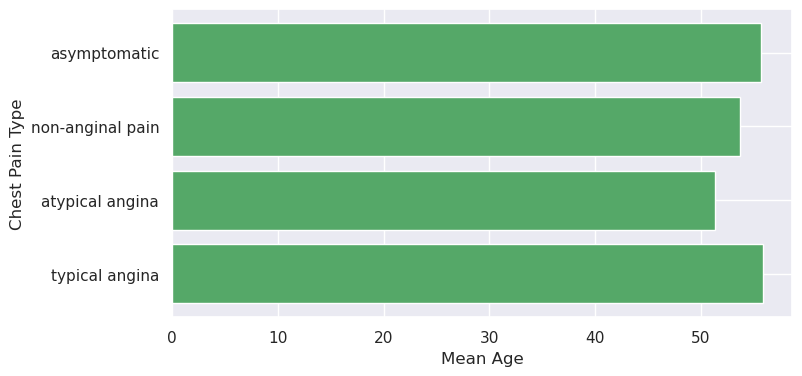

In [65]:
# Another way of plotting without axes
fig = plt.figure(figsize=(8, 4))
plt.barh(chest_pain_types, mean_age, align='center', color="g")
plt.yticks(chest_pain_types, chest_pain_types_names)
plt.xlabel('Mean Age')
plt.ylabel('Chest Pain Type')


plt.show()

Matplotlib follows the philosophy of Imperative Visualization, you are in control of everything and you need to declare every single dot/bar/line/etc.

The Examples Gallery of matplotlib will be your best friend: https://matplotlib.org/stable/gallery/index.html

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Source: https://seaborn.pydata.org/

In [52]:
import seaborn as sns

sns.set_theme(style="darkgrid")

### Scatter Plot

<Axes: xlabel='age', ylabel='chol'>

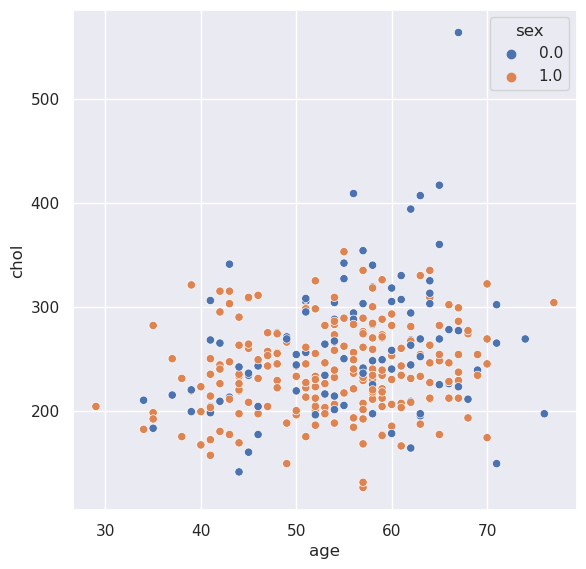

In [53]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(
    x="age",
    y="chol",
    hue="sex",
    data=heart_df,
    ax=ax
)

### Line Plot

In [50]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

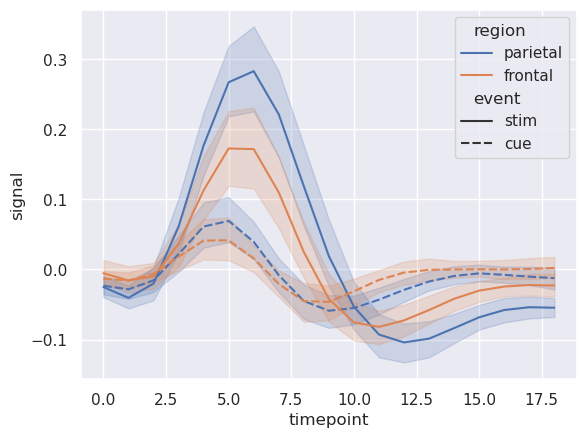

In [54]:
# Plot the responses for different events and regions
sns.lineplot(
    x="timepoint",
    y="signal",
    hue="region",
    style="event",
    data=fmri
)

### Bar Plot

In [72]:
chest_pain_type_dict = {
    1: "typical angina",
    2: "atypical angina",
    3: "non-anginal pain",
    4: "asymptomatic"
}

heart_df = heart_df.assign(chest_pain=lambda x: x["cp"].map(chest_pain_type_dict))
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chest_pain
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,typical angina
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,asymptomatic
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,asymptomatic
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,non-anginal pain
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,atypical angina


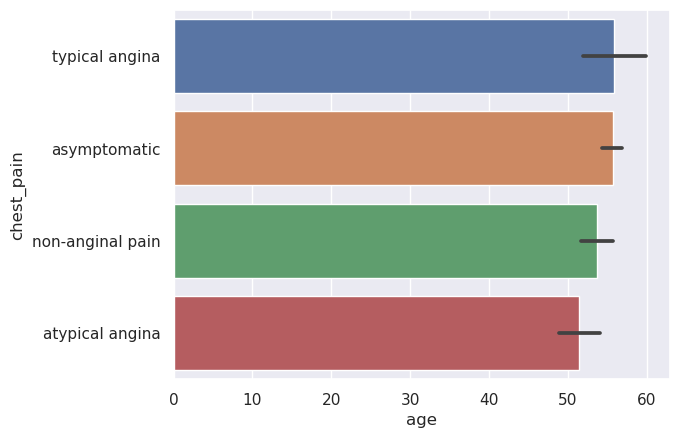

In [77]:
g = sns.barplot(
    data=heart_df,
    x="age",
    y="chest_pain",
    estimator="mean"
    # hue="sex",
    # alpha=.6
)

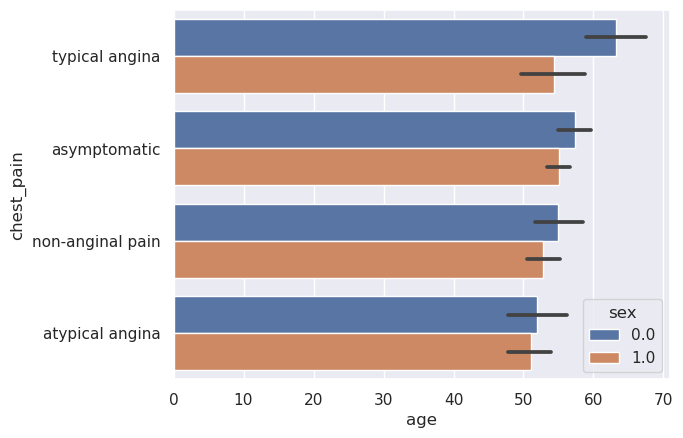

In [83]:
g = sns.barplot(
    data=heart_df,
    x="age",
    y="chest_pain",
    hue="sex",
    estimator="mean",
)

### Histogram

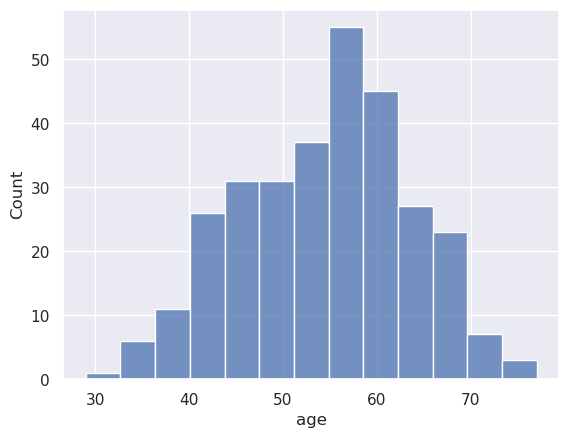

In [93]:
g = sns.histplot(
    data=heart_df,
    x="age"
)

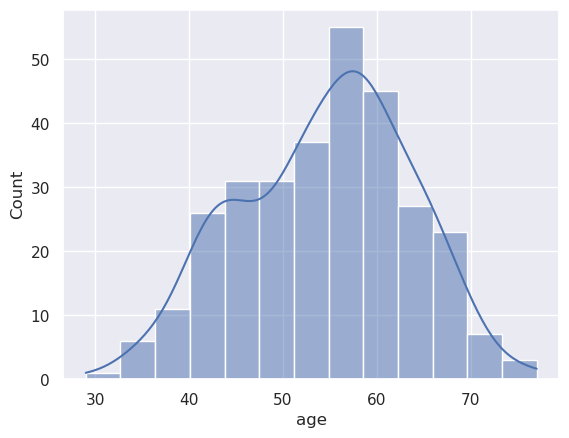

In [97]:
g = sns.histplot(
    data=heart_df,
    x="age",
    kde=True
)

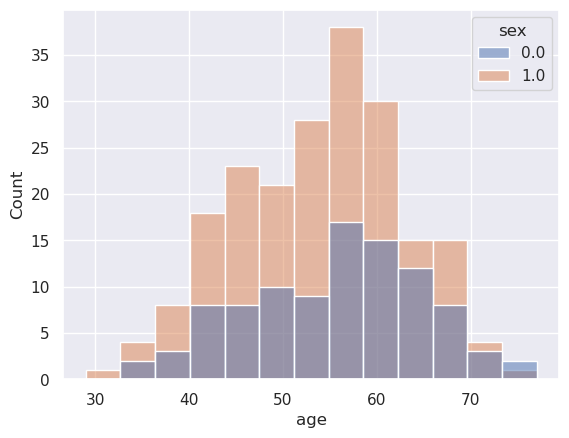

In [ ]:
g = sns.histplot(
    data=heart_df,
    x="age",
    hue="sex",
)

### Box Plot

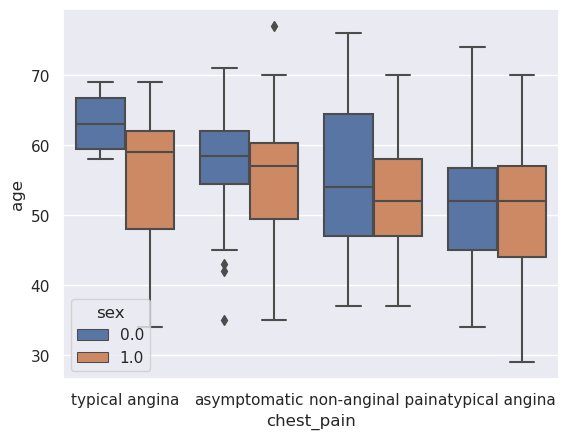

In [89]:
g = sns.boxplot(
    data=heart_df,
    x="chest_pain",
    y="age",
    hue="sex",
)

### Heat Map

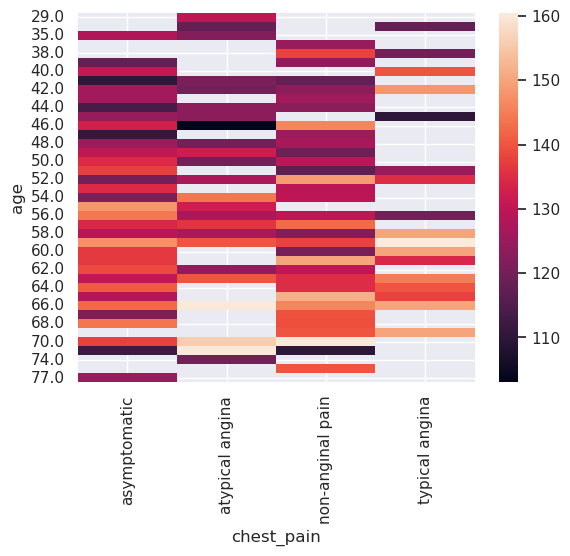

In [109]:
tmp_data = heart_df.pivot_table(
    index="age",
    columns="chest_pain",
    values="trestbps",

)
g = sns.heatmap(tmp_data)

Seaborn is a nice library for Declarative Visualization, as you noticed the inputs are data and then you only need to declare how that data will be used. For example Seaborn computed all the mean values for us.

More examples here: https://seaborn.pydata.org/examples/index.html